<a href="https://colab.research.google.com/github/vsvale/Demystifying-Machine-Learning-Operations-MLOps/blob/main/Demystifying_Machine_Learning_Operations_(MLOps).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Prever miles per Gallon com objetivo de comprar apenas carros que tenham melhor custo-beneficio

In [ ]:
!git clone https://github.com/vsvale/Demystifying-Machine-Learning-Operations-MLOps.git

Cloning into 'Demystifying-Machine-Learning-Operations-MLOps'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot() as plt

In [ ]:
automobile_df = pd.read_csv('/content/Demystifying-Machine-Learning-Operations-MLOps/auto-mpg.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
automobile_df.shape

(398, 9)

In [ ]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [ ]:
automobile_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
automobile_df=automobile_df.fillna(automobile_df.mean())

In [ ]:
automobile_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
automobile_df=automobile_df.drop(['car name'],axis=1)

In [ ]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
X = automobile_df.drop('mpg',axis=1)
Y = automobile_df['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)
print('R2: ',linear_model.score(x_train,y_train))
y_pred = linear_model.predict(x_test)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))

R2:  0.8136117493126179
Mean Squared Error:  9.228293943298738


In [ ]:
print(linear_model.predict([[6,117,100,3000,15,85,1]]))

[27.10211162]


In [ ]:
import pickle

In [ ]:
pickle.dump(linear_model,open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request
import requests
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/predict',methods=['POST'])
def home():
  cylinders = int(request.args.get('cylinders',''))
  displacement = int(request.args.get('displacement',''))
  horsepower = int(request.args.get('horsepower',''))
  weight = int(request.args.get('weight',''))
  acceleration = int(request.args.get('acceleration',''))
  modelYear = int(request.args.get('modelYear',''))
  origin = int(request.args.get('origin',''))
  prediction = model.predict([[cylinders,displacement,horsepower,weight,acceleration,modelYear,origin]])
  #prediction = model.predict([[6,117,100,3000,15,85,1]])
  print('******************************************')
  print(prediction)
  return 'prediction is '+ str(prediction[0])

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a65fd8e01c9e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [28/Feb/2021 21:35:37] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [28/Feb/2021 21:35:38] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/Feb/2021 21:35:49] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [28/Feb/2021 21:47:22] "POST /predict?cylinders=6&displacement=117&horsepower=100&weight=3000&acceleration=15&modelYear=85&origin=1 HTTP/1.1" 200 -


******************************************
[27.10211162]


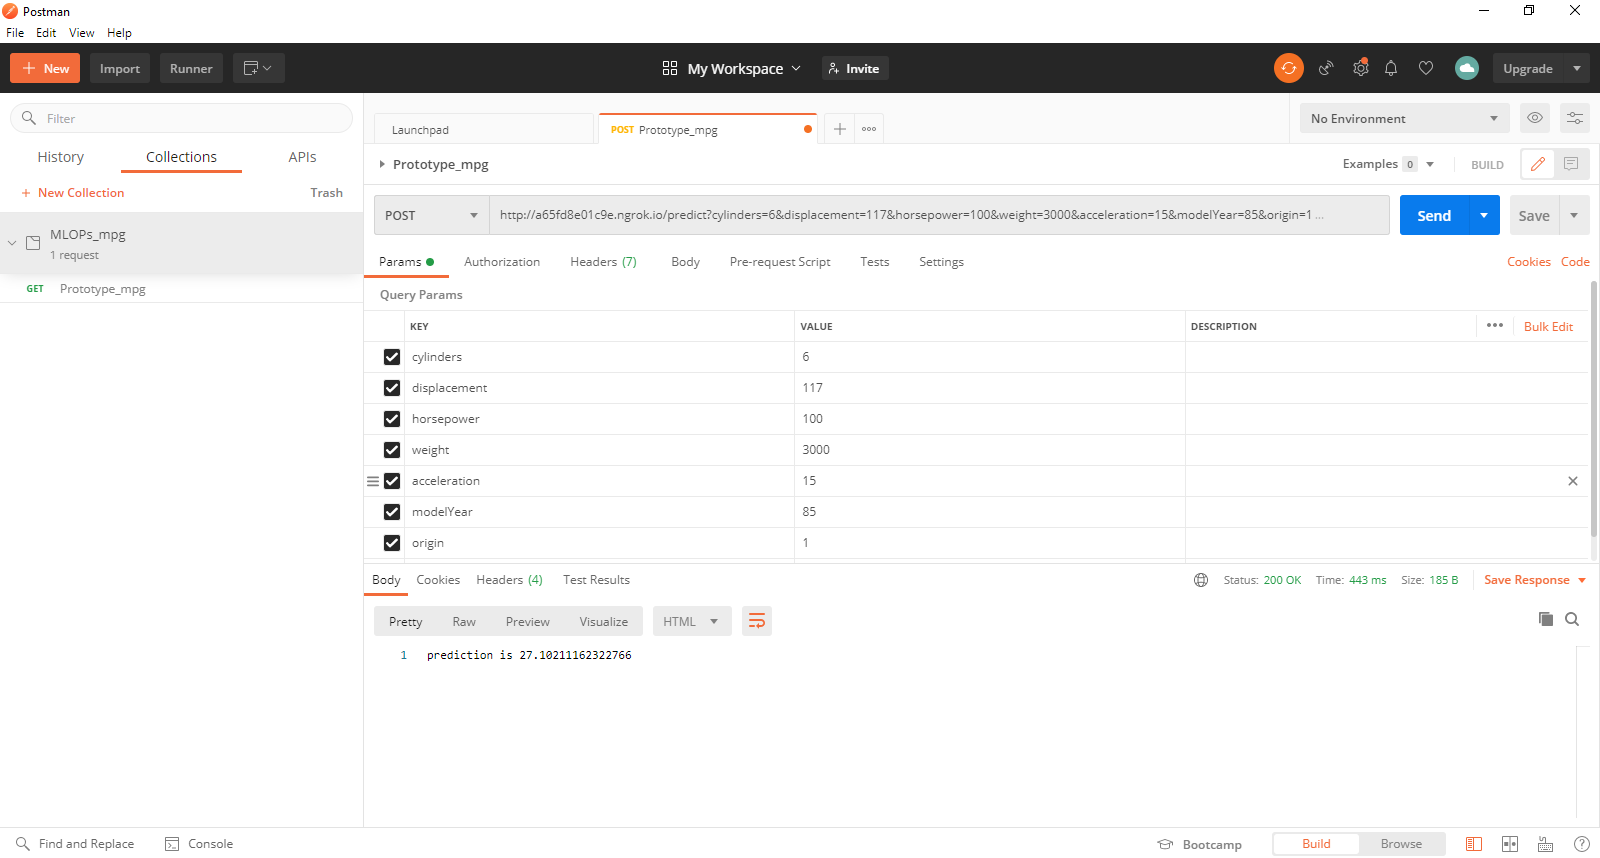